The following script consists of a Python version of Andrew Ng Stanford Course 'Machine Learning' taught on the Coursera Platform
Note: All exercise data and structure are credited to Stanford University 

**Caveat:** Contrary to the modularity presented in Octave scripts and as I'm using Jupyter Notebooks for educational purposes we will implement the functions on the same notebook where we will call them

# Exercise 1 - K-Means Clustering

In [1]:
# Import numpy libraries to deal with matrixes and vectors
import numpy as np
# Import pandas do read data files
import pandas as pd
# Import matplotlib to plot data
import matplotlib.pyplot as plt

# Import Image 
from PIL import Image

# Import math 
import math 

# Import scipy optimization function
from scipy import optimize, io
from scipy.ndimage import rotate

# Matplotlib notebook property
%matplotlib inline

Dimensionality reduction is one the common problems that you can solve using machine learning.
<br>
**We will start by looking at the k-means algorithm that automatically clusters similar data:**

In [4]:
# Read the dataset 
X = io.loadmat('ex7data2.mat')['X']

In [5]:
# Set the initial centroids 
K = 3 

initial_centroids = np.array([[3,3],[6,2],[8,5]])

We have defined three arbitrary centroids - the next function is going the assign each observation to the closest centroid. <br>
The distance that we will compute is the euclidean distance.

In [6]:
def findClosestCentroids(
    X: np.array,
    centroids: np.array
) -> np.array:
    '''
    Assigns each row from X array
    to the closest centroid in centroids
    using euclidean distance.
    
    Args:
        X(np.array): Original data.
        centroids(np.array): Initial centroids
        of clusters.
    
    Returns:
        idx(np.array): Cluster assigned to 
        each observation in X array.        
    '''
    
    K = centroids.shape[0]
    
    idx = np.zeros([X.shape[0],1])
    
    obs = X.shape[0]
    
    for i in range(obs):
        
        distance_var = (X[i]-centroids)**2
        closest_centroid = distance_var.sum(axis=1).argmin()
        idx[i] = closest_centroid+1
    
    return idx

In [7]:
idx = findClosestCentroids(X, initial_centroids)

In [8]:
print("First three observations are closest to centrois {}".format(idx[0:3].flatten()))

First three observations are closest to centrois [1. 3. 2.]


Based on the euclidean distance from each observation to the centroid:
<br>
- Observation one is closer to the first centroid;
<br>
- Observation two is closer to the third centroid;
<br>
- Observation three is closer to the second centroid;
<br>
<br>
We can also confirm this by plotting the data:

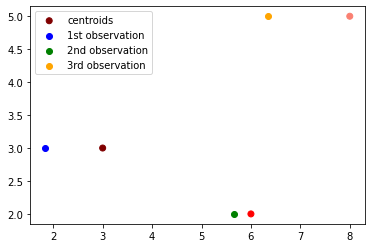

In [9]:
plt.scatter(initial_centroids[:,0],initial_centroids[:,1], color=['maroon','red','salmon'])
plt.scatter(X[0,0],initial_centroids[0,1], color='blue')
plt.scatter(X[1,0],initial_centroids[1,1], color='green')
plt.scatter(X[2,0],initial_centroids[2,1], color='orange')
plt.legend(['centroids','1st observation','2nd observation','3rd observation'])

The centroids have a scale of red. Dark red is the first centroid and lighter red is the third centroid.
<br>
We can confirm that the distances we have calculated are indeed true. **Can you guess where does the fourth observation lies by the graph below?**

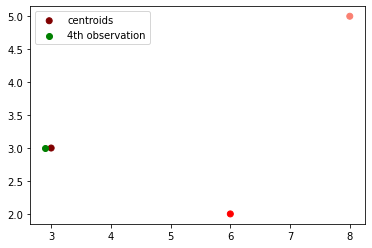

In [10]:
plt.scatter(initial_centroids[:,0],initial_centroids[:,1], color=['maroon','red','salmon'])
plt.scatter(X[3,0],initial_centroids[0,1], color='green')
plt.legend(['centroids','4th observation'])

In [11]:
print("Fourth observation belongs to cluster {}".format(idx[4].flatten()))

Fourth observation belongs to cluster [1.]


We can now compute new means with the variables we have assigned to each centroid. 
<br>
The values from each cluster mean will be calculated as follows:

<img src="assets/ClusterMeanFormula.JPG">

In [12]:
def computeCentroids(
    X: np.array, 
    idx: np.array,
    K: int
)-> np.array:
    '''
    Computes centroids based on
    row that belong to that centroid
    
    Args:
        X(np.array): Original objects.
        idx(np.array): Cluster of each X 
        observations.
        K(int): Number of clusters.
        
    Returns:
        centroids(np.array): New centroids 
        re-assigned based on X observations.
    '''
    
    m,n = X.shape
    centroids = np.zeros([K, n])
    
    for i in range(1,K+1):
        centroids[i-1,:] = X[np.array(idx==i).flatten(),:].mean(axis=0)
    
    return centroids

In [13]:
centroids = computeCentroids(X, idx, K)

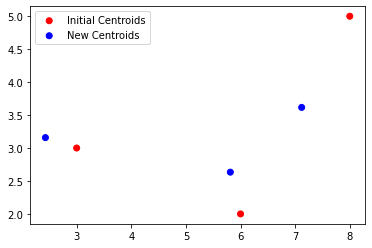

In [14]:
plt.scatter(initial_centroids[:,0],initial_centroids[:,1], color=['red','red','red'])
plt.scatter(centroids[:,0],centroids[:,1], color=['blue','blue','blue'])
plt.legend(['Initial Centroids','New Centroids'])

As you can see, the centroids move. The objective of k-means is to iterate until you minimize the distance between the centroids and each observation until convergence is achieved. 

**We are now going to implement the k-means algorithm:**

In [15]:
# Number of centroids
k = 3 

# Max iterations
max_iters = 10

# Initial centroids
initial_centrois = np.array([[3, 3],[6, 2],[8, 5]])

In [16]:
def runkMeans(
    X: np.array,
    initial_centroids: np.array,
    max_iters: int
):
    '''
    Runs k-means algorithms, re-calculating
    the centroid values until max_iters
    is reached.
    
    Args:
        X(np.array): Original features.
        initial_centroids(np.array): Values
        of initial centroids.
        max_iters(int): Number of 
        iterations to run k-means.

    Returns:
        centroids(np.array): New values 
        of optimized centroids.
        idx(np.array): Array with cluster
        assigned to each X observation.
    '''
    
    # Retrieve shape of original data
    m, n = X.shape
    
    # Compute initial centroids
    centroids = initial_centroids
    
    # Compute placeholder for cluster number
    idx = np.zeros([m,1])
    
    # For each iteration, find the closest centroids and compute
    # the new centroid means
    for i in range(1, max_iters):
        
        idx = findClosestCentroids(X, centroids)
        centroids = computeCentroids(X, idx, K)
        
    return centroids, idx

In [17]:
centroids, idx = runkMeans(X, initial_centroids, max_iters)

In [18]:
print("After 10 iterations, the new centroids are \n {}".format(centroids))

After 10 iterations, the new centroids are 
 [[1.95399466 5.02557006]
 [3.04367119 1.01541041]
 [6.03366736 3.00052511]]


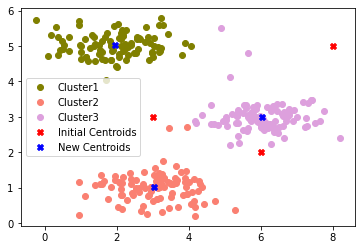

In [19]:
plt.scatter(X[np.array(idx==1).flatten(),:][:, 0],
           X[np.array(idx==1).flatten(),:][:, 1], color='olive')
plt.scatter(X[np.array(idx==2).flatten(),:][:, 0],
           X[np.array(idx==2).flatten(),:][:, 1], color='salmon')
plt.scatter(X[np.array(idx==3).flatten(),:][:, 0],
           X[np.array(idx==3).flatten(),:][:, 1], color='plum')
plt.scatter(initial_centroids[:,0],initial_centroids[:,1], color="red", marker='X')
plt.scatter(centroids[:,0],centroids[:,1], color="blue", marker='X')
plt.legend(['Cluster1','Cluster2','Cluster3','Initial Centroids','New Centroids'])

We can see the power of k-means in the graph above. Just with 10 iterations we were able to center the centroids in each cloud of points - real life problems are not as simple and centroids might not fit so well but normally k-means can find a real simple and adjustable approximation to several problems.

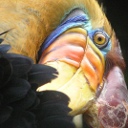

In [21]:
image = Image.open(r"bird_small.png")
image

In [22]:
A = np.asarray(image)

In [23]:
A = A/255

In [24]:
# Get image size
img_size = A.shape

In [25]:
# Reshape our image into an RGB format
X = A.reshape(A.shape[0]*A.shape[1],A.shape[2])

In [26]:
# Set k-means cluster number and max iterations
K = 16
max_iters = 10

**To lower the hypothesis of a bad k-means convergence, it is considered a good practice to initialize the centroids randomnly.**

In [27]:
def kMeansInitCentroids(
    X: np.array,
    K: int
):
    '''
    Initializing centroids based on 
    sample from the observations X.
    
    Args:
        X(np.array): Array with each
        observations.
        K(int): Number of centroids.
        
    Returns:
        centroids(np.array): Centroid
        means after randomizing observations.
    
    '''
    # Subset sixteen random observations that will
    # be used as centroids
    random_indexes = np.random.uniform(
        low=0, 
        high=X.shape[0], 
        size=(K,)
    ).astype(int)
    
    centroids = X[random_indexes,:]
    
    return centroids

In [28]:
initial_centroids = kMeansInitCentroids(X, K);

In [29]:
# Run K-Means Algorithm
centroids, idx = runkMeans(X, initial_centroids, max_iters)

**Now that we have ran k-means clustering, what happens to our image?***

In [30]:
idx = findClosestCentroids(X, centroids);

In [31]:
# Find new values based on cluster centroid
X_recovered = centroids[idx.astype(int).flatten()-1,:]

In [32]:
# Reshape to original image size
X_recovered = X_recovered.reshape(img_size)

In [33]:
images = {'image': image,
      'compressed_image': X_recovered}

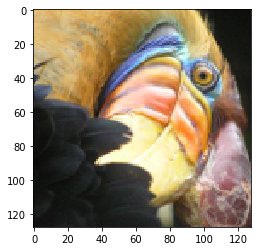

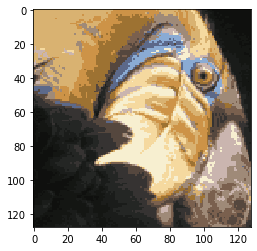

In [34]:
for img in images:
    plt.figure()
    plt.imshow(images[img], interpolation='nearest')

**We have successfully compressed the image using k-means clustering.** 
<br>
<br>
Reducing dimensionality can have a lot of advantages for multiple learning algorithms (avoiding overfitting, for example) as well as computational advantages, such as, reducing the space needed to store several objects. 